<a href="https://colab.research.google.com/github/shivarjunpawan/CSE-3320-OPERATING-SYSTEMS-File-System-Internals/blob/main/Logistic_forward_and_backward_pass_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import torch
from torch.autograd import Variable

In [65]:
# Assign the variables
w1 = torch.tensor([1.0], requires_grad=True)
w2 = torch.tensor([1.0], requires_grad=True)
w0 = torch.tensor([1.0], requires_grad=True)


In [66]:
# printing the inital values of w1,w2 and w0
print("The values of w1=",w1)
print("The values of w2=",w2)
print("The values of w0=",w0)

The values of w1= tensor([1.], requires_grad=True)
The values of w2= tensor([1.], requires_grad=True)
The values of w0= tensor([1.], requires_grad=True)


In [67]:
# defining the sigmoid function
def sigmoid(x):
  y= 1/ (1+ torch.exp(-2*x))
  return y

# defining the forward pass
def forward(x1,x2):
  g= w1*x1 + w2*x2 + w0
  p=sigmoid(g)
  return p


In [68]:
forward(1,2)

tensor([0.9997], grad_fn=<MulBackward0>)

In [69]:
# defining loss function
def loss(x1,x2,y):
  y_pred = forward(x1,x2)
  cel=-y*torch.log(y_pred)-(1-y)*torch.log(1-y_pred)
  return cel


In [70]:
# assigning the values to the eqn 'g'
loss1=loss(1,2,1)
loss1

tensor([0.0003], grad_fn=<SubBackward0>)

In [71]:
# assigning the values to the eqn 'g'
loss2=loss(2,1,0)
loss2

tensor([8.0004], grad_fn=<SubBackward0>)

In [72]:
# total loss
total_loss=loss1+loss2
total_loss

tensor([8.0007], grad_fn=<AddBackward0>)

In [75]:
# print the w1,w2 and w0 grad, no value still backpass not performed
w1.grad

In [76]:
total_loss.backward()

In [77]:
# print the w1,w2 and w0 grad
w1.grad,w2.grad,w0.grad

(tensor([3.9982]), tensor([1.9981]), tensor([1.9987]))

In [81]:
# make small changes in the 'w' to improve the loss
lr=0.001 # learning rate
w1.data=w1.data-lr*w1.grad.data
w2.data=w2.data-lr*w2.grad.data
w0.data=w0.data-lr*w0.grad.data
w1,w2,w0

(tensor([-7.0163], requires_grad=True),
 tensor([-3.0061], requires_grad=True),
 tensor([-3.0075], requires_grad=True))

In [83]:
#Earse the w1,w2 and w0 grad values and run the total loss
w1.grad.data.zero_()
w2.grad.data.zero_()
w0.grad.data.zero_()
# print the w1,w2 and w0 grad
w1,w2,w0

(tensor([-7.0163], requires_grad=True),
 tensor([-3.0061], requires_grad=True),
 tensor([-3.0075], requires_grad=True))

In [85]:
total_loss=loss(1,2,1)+loss(2,1,0)
total_loss


tensor([32.0721], grad_fn=<AddBackward0>)

In [86]:
total_loss.backward()

In [88]:
# print the w1,w2 and w0 grad
w1.grad,w2.grad,w0.grad

(tensor([-2.]), tensor([-4.]), tensor([-2.]))

In [91]:
# make small changes in the 'w' to improve the loss
lr=0.05 # learning rate
w1.data=w1.data-lr*w1.grad.data
w2.data=w2.data-lr*w2.grad.data
w0.data=w0.data-lr*w0.grad.data
w1,w2,w0

(tensor([-6.9143], requires_grad=True),
 tensor([-2.8021], requires_grad=True),
 tensor([-2.9055], requires_grad=True))

In [92]:
total_loss=loss(1,2,1)+loss(2,1,0)
total_loss

tensor([30.8481], grad_fn=<AddBackward0>)

In [104]:
for i in range(100):
  total_loss=loss(1,2,1)+loss(2,1,0)
  total_loss.backward()
  lr=15# learning rate
  w1.data=w1.data-lr*w1.grad.data
  w2.data=w2.data-lr*w2.grad.data
  w0.data=w0.data-lr*w0.grad.data
  w1.grad.zero_()
  w2.grad.zero_()
  w0.grad.zero_()
  # calculate the total loss
  total_loss=loss(1,2,1)+loss(2,1,0)
  print(total_loss)


tensor([0.0005], grad_fn=<AddBackward0>)
tensor([0.0005], grad_fn=<AddBackward0>)
tensor([0.0005], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0004], grad_fn=<AddBackward0>)
tensor([0.0003],

ValueError: ignored

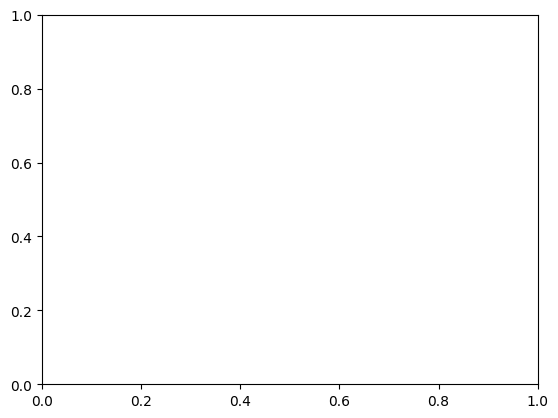

In [106]:
import matplotlib.pyplot as plt
plt.plot(range(100), total_loss, label="Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Convergence Graph")
plt.legend()
plt.show()